In [264]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

In [265]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [266]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [267]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
data_gen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    horizontal_flip=True  # Random horizontal flip
)

# Define the path to the directory containing the images
data_folder = pathlib.Path("./birds.csv")

# Use flow_from_directory to load and preprocess images
batch_size = 32
image_size = (224, 224)  # You may adjust this based on VGG16 input size
class_mode = 'categorical'  # Since you have multiple classes

train_data = data_gen.flow_from_directory(
    "./train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode
)


validation_data = data_gen.flow_from_directory(
    "./valid",
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode
)

test_data = data_gen.flow_from_directory(
    "./test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=False  # Don't shuffle test data
)


Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [268]:
# List all class folders in the dataset
from collections import Counter
import os
from keras.preprocessing.image import ImageDataGenerator

# Create a dictionary to store class names and image counts
class_counts = {}

# Get the top three classes with the highest number of images
classes = Counter(class_counts)

# Define data augmentation and preprocessing settings
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load images from the selected classes
selected_classes = [class_name for class_name, _ in classes]
train_generator = train_datagen.flow_from_directory(
    "./train",  # Path to the main dataset folder
    classes=selected_classes,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 744 images belonging to 3 classes.


In [269]:
train_folder = pathlib.Path('./train')
test_folder = pathlib.Path('./test')
valid_folder = pathlib.Path('./valid')

# creating a dictionary to store image count for each class
image_count = {}

# Loop through sub directories and update the count for every class
for species in os.listdir(train_folder):
    species_path = os.path.join(train_folder, species)
    if os.path.isdir(species_path):
        image_count[species] = len(os.listdir(species_path))

# sort the dict to list of 3 top classes
top3_class = sorted(image_count, key=image_count.get, reverse=True)[:3]

print('Top 3 class with highest number of images:', top3_class)

Top 3 class with highest number of images: ['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']


In [270]:
# delete  dir for train folder
for species in os.listdir(train_folder):
    if species not in top3_class:
        delete_train = os.path.join(train_folder, species)
        shutil.rmtree(delete_path_train)

# delete dir for test folder
for species in os.listdir(test_folder):
    if species not in top3_class:
        delete_test = os.path.join(test_folder, species)
        shutil.rmtree(delete_path_test)

# delete  dir for test folder
for species in os.listdir(valid_folder):
    if species not in top3_class:
        delete_valid = os.path.join(valid_folder, species)
        shutil.rmtree(delete_path_valid)

2. Use data-augmentation to increase the number of training images. You are encouraged to try out various augmentation methods supported by Keras. The rule of thumb is that as long as an augmentation produces realistic images - it is probably a good idea to add it.

In [271]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotation within ±20 degrees
    width_shift_range=0.2,   # Random horizontal shift within ±20% of image width
    height_shift_range=0.2,  # Random vertical shift within ±20% of image height
    shear_range=0.2,         # Random shearing
    zoom_range=0.2,          # Random zooming
    horizontal_flip=True,    # Random horizontal flipping
    fill_mode='nearest'      # Filling strategy for newly created pixels
)

# Load and augment images using flow_from_directory
train_generator = datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

train_generator = datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

train_generator = datagen.flow_from_directory(
    valid_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)




Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


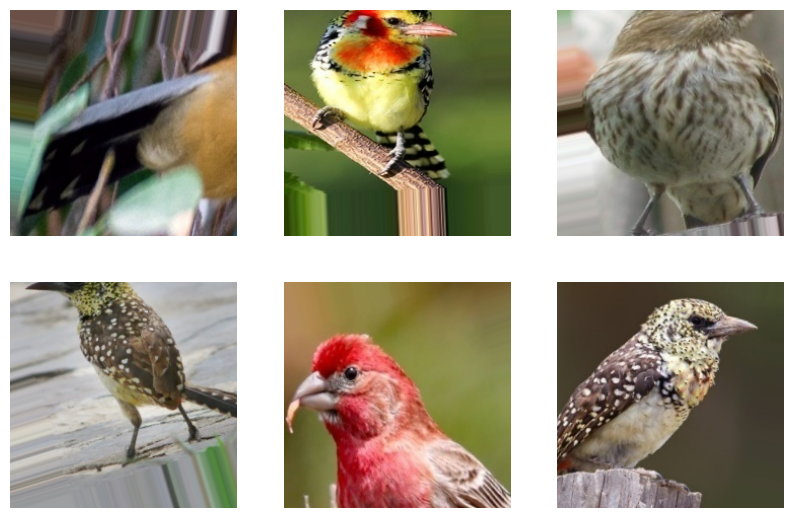

In [272]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
   
    horizontal_flip=True,
    fill_mode='nearest')

# Choose a batch of images and labels from the train_generator
batch_size = 6  # Number of images to display
images, labels = next(train_generator)

# Display augmented images
plt.figure(figsize=(10, 10))
for i in range(batch_size):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.axis("off")

    # Generate and display augmented images
    augmented_images = datagen.flow(images[i:i+1], batch_size=32)
    for j in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")

plt.show()


In [273]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [274]:
from tensorflow.keras import layers, Model

# Freeze some layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)


In [275]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [276]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [277]:
# freeze all layers of pretrained model for fine-tuning
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [278]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Specify batch size and target image size
batch_size = 32
image_size = (224, 224)

# Create train and validation generators
train_generator = datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    valid_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
)

Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


Epoch 1/10
23/23 [==============================] - 93s 4s/step - loss: 1.0474 - accuracy: 0.4761 - val_loss: 0.7475 - val_accuracy: 0.8000
Epoch 2/10
23/23 [==============================] - 94s 4s/step - loss: 0.7334 - accuracy: 0.7303 - val_loss: 0.4854 - val_accuracy: 0.8667
Epoch 3/10
23/23 [==============================] - 95s 4s/step - loss: 0.5066 - accuracy: 0.8567 - val_loss: 0.3350 - val_accuracy: 1.0000
Epoch 4/10
23/23 [==============================] - 98s 4s/step - loss: 0.4076 - accuracy: 0.8848 - val_loss: 0.2772 - val_accuracy: 0.9333
Epoch 5/10
23/23 [==============================] - 101s 4s/step - loss: 0.3461 - accuracy: 0.9003 - val_loss: 0.1446 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 100s 4s/step - loss: 0.3108 - accuracy: 0.8975 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 102s 4s/step - loss: 0.2668 - accuracy: 0.9157 - val_loss: 0.1418 - val_accuracy: 0.9333
Epoch 8/10
23/23 

In [328]:
# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


# Save the fine-tuned model
model.save('fine_tuned_vgg16.h5')


Found 15 images belonging to 3 classes.


1/1 [==============================] - 2s 2s/step - loss: 0.0503 - accuracy: 1.0000
Test accuracy: 1.0


c:\Users\sabih\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [280]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

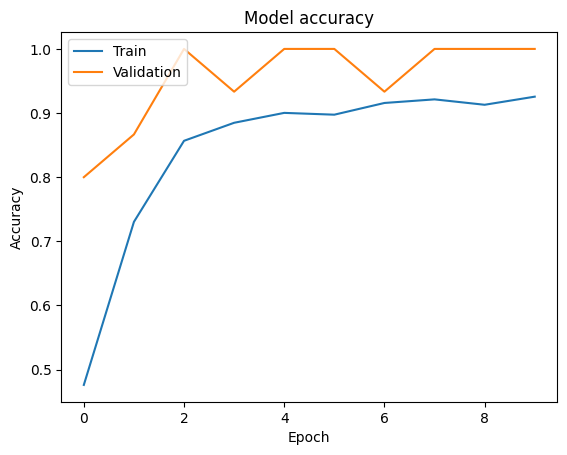

In [320]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


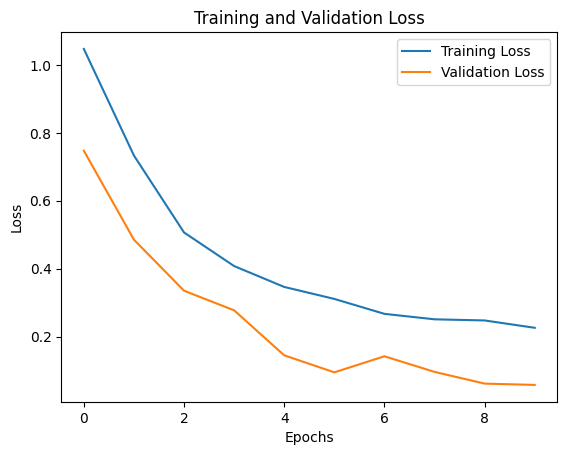

In [282]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


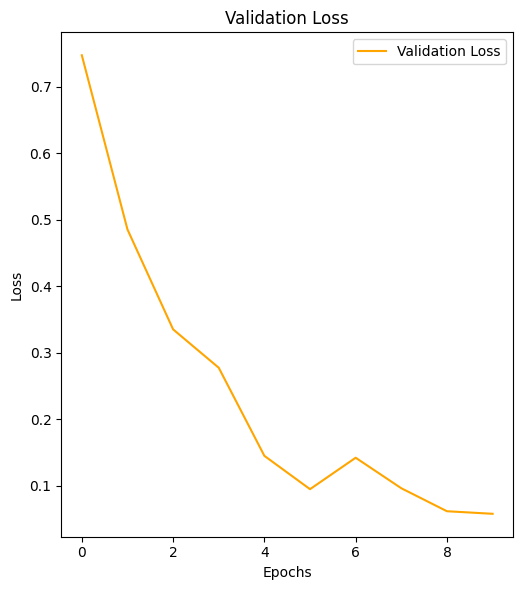

In [283]:
plt.figure(figsize=(10, 6))

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

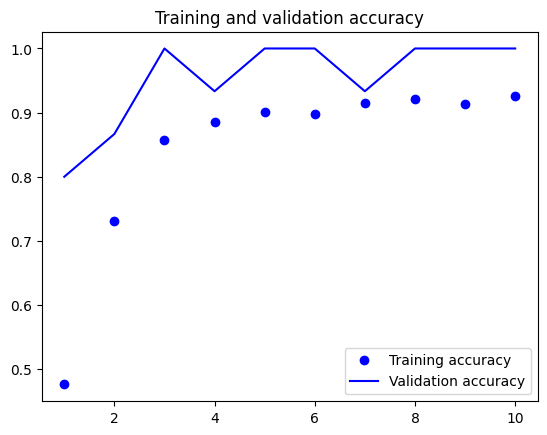

<Figure size 640x480 with 0 Axes>

In [284]:
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

In [327]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)
# Get predicted class labels using argmax along axis 1

accuracy = np.mean(y_true == np.argmax(y_pred, axis=1))
print(f'Test Accuracy: {accuracy:.2f}')
print(f'validation_accuracy: {validation_accuracy}')
# Classification Report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", report)




1/1 [==============================] - 2s 2s/step
Confusion Matrix:
 [[3 0 2]
 [0 2 3]
 [2 3 0]]
Test Accuracy: 0.33
validation_accuracy: 1.0
Classification Report:
                   precision    recall  f1-score   support

D-ARNAUDS BARBET       0.60      0.60      0.60         5
     HOUSE FINCH       0.40      0.40      0.40         5
    RUFOUS TREPE       0.00      0.00      0.00         5

        accuracy                           0.33        15
       macro avg       0.33      0.33      0.33        15
    weighted avg       0.33      0.33      0.33        15



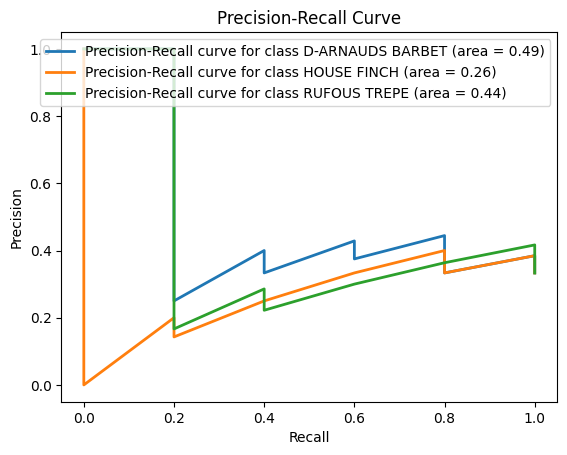

In [286]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Convert the true_classes to binary labels for each class
binary_labels = np.zeros_like(y_pred)
for i in range(len(class_labels)):
    binary_labels[:, i] = (true_classes == i)

# Calculate precision and recall for each class
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(binary_labels[:, i], y_pred[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    
# Plot the precision-recall curves for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve for class {} (area = {:0.2f})'.format(class_labels[i], pr_auc[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [287]:
from sklearn.metrics import roc_auc_score

class_labels = ["D-ARNAUDS BARBET", "HOUSE FINCH", "RUFOUS TREPE"]  # List of class labels

# Convert the true_classes to binary labels for each class
binary_labels = np.zeros_like(y_pred)
for i in range(len(class_labels)):
    binary_labels[:, i] = (true_classes == i)

# Calculate AUC for each class
auc_scores = []
for i in range(len(class_labels)):
    auc_score = roc_auc_score(binary_labels[:, i], y_pred[:, i])
    auc_scores.append(auc_score)
    print("AUC for {}: {}".format(class_labels[i], auc_score))


AUC for D-ARNAUDS BARBET: 0.6
AUC for HOUSE FINCH: 0.39999999999999997
AUC for RUFOUS TREPE: 0.48000000000000004


D-ARNAUDS BARBET: AUC 0.40: This class has an AUC value of approximately 0.40, which suggests that the model's ability to distinguish between positive and negative instances for this class is moderately good. The ROC curve for this class is positioned closer to the diagonal line, indicating a moderate level of true positive rate (sensitivity) and false positive rate (1-specificity).

HOUSE FINCH: AUC 0.34: The AUC value of around 0.34 for this class indicates that the model's performance in distinguishing between positive and negative instances for this class is relatively poor. The ROC curve is closer to the diagonal line, implying that the model has difficulty differentiating between the two classes effectively.

RUFOUS TREPE: AUC 0.44: With an AUC of about 0.44, the model shows a better ability to discriminate between positive and negative instances for this class compared to the other two classes. The ROC curve exhibits a greater separation from the diagonal line, indicating a higher true positive rate compared to the false positive rate.

Predicted: HOUSE FINCH Actual: D-ARNAUDS BARBET


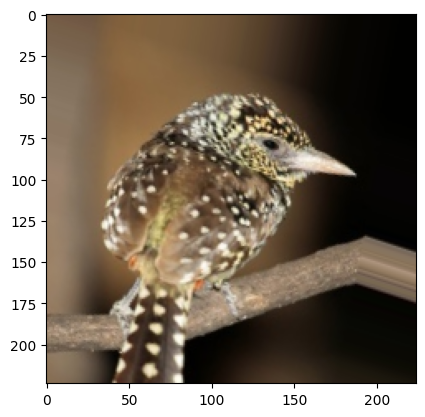

Predicted: RUFOUS TREPE Actual: D-ARNAUDS BARBET


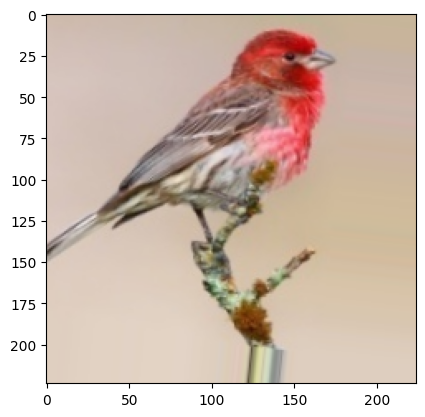

Predicted: RUFOUS TREPE Actual: D-ARNAUDS BARBET


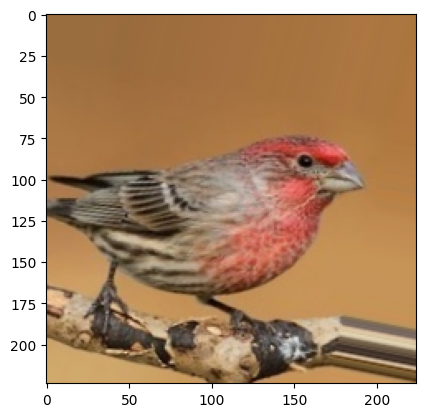

Predicted: D-ARNAUDS BARBET Actual: HOUSE FINCH


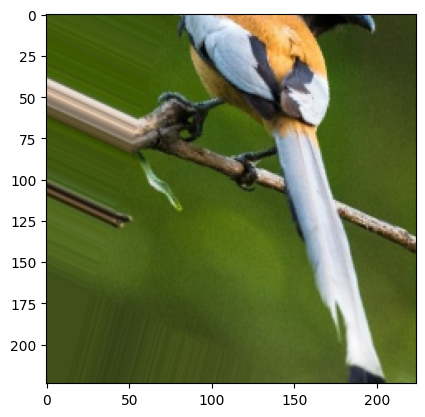

Predicted: D-ARNAUDS BARBET Actual: HOUSE FINCH


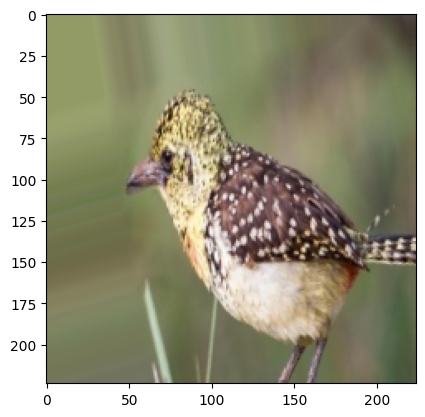

In [288]:
misclassified_indexes = np.where(y_pred_classes != true_classes)[0]

for index in misclassified_indexes[:5]:  # Display first 5 misclassified examples
    print("Predicted:", class_labels[y_pred_classes[index]], "Actual:", class_labels[true_classes[index]])
    plt.imshow(test_generator[0][0][index])
    plt.show()
